<a href="https://colab.research.google.com/github/pipprualgy/Checkpoint-1-AVD/blob/main/Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Peringkat Universitas Dunia**

#**Import Library** [](https://colab.research.google.com/drive/1X9gwXegynSTry_rirwmgmez3taMzLYrB#scrollTo=LZ2sKiyGWllL&line=1&uniqifier=1)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Business Understanding**

##Business Objective

Tujuan analisis ini adalah untuk memahami faktor-faktor penentu peringkat pada perguruan tinggi. Data mencakup kualitas riset, reputasi akademik, jumlah mahasiswa dan pengajar asing, dan keberhasilan lulusan

##Assessment Situation

Dataset ini memiliki potensi strategis yang tinggi dengan memanfaatkan 3 sumber data utama (THE, ARWU, dan CWUR), namun menghadapi tantangan teknis berupa beberapa data yang hilang. Meskipun terdapat tantangan, antisipasi melalui pembersihan data yang ketat akan memastikan hasil analisis yang akurat.

##Analytic Goals

1. Mengembangkan skema pencocokan sumber untuk menyatukan data-data universitas yang hilang atau berebda penulisan antar sumber terkait (THE, ARWU, CWUR) untuk membangun suatu database yang berkualitas dan konsisten

2. Melakukan penanganan pada data yang hilang dengan cara menerapkan teknik statistik untuk mengisi skor yang hilang pada tahun tertentu sehingga data historis universitas tetap dapat dianalisis tanpa terputus.

3. Mengidentifikasi variabel mana yang memiliki korelasi terkuat terhadap kenaikan peringkat di setiap platform

##Project Plan

1. Integrasi data. berupa pembersihan data, penanganan nilai yang hilang, dan sinkronisasi nama universitas antar dataset. timeline: pekan 1

2. Standarisasi skor dari berbagai lembaga pemeringkat agar bisa dibandingkan secara objektif dengan cara menyamakan skala atau rentang nilai. timwline: pekan 2

3. menganalisis dengan cara visualisasi perkembangan peringkat dan pemetaan performa. timeline: pekan 3

4. Melakukan pemodelan statistik dengan cara mengidentifikasi indikator yang paling berpengaruh terhadap kenaikan peringkat melalui analisis korelasi. timeline: timeline: pekan 4-5, memakan waktu 2 pekan karena proses pengelompokan, validasi serta pengujian model.

5. Penyusunan laporan dasbor interaktif dan rekomendasi. timeline: pekan 6.

    penyusunan dasbor interaktif ini memungkinkan pihak kampus melihat posisi kampus mereka dengan pesaing global lainnya. rekomendasi berfungsi untuk menyarankan universitas agar lebih fokus meningkatkan kualitas riset internasional jika data menunjukkan bahwa sektor tersebut memiliki bobot yang besar terhadap faktor peringkat kampus

#**Data Understanding**

##**Dataset**

In [2]:
file = "/content/drive/MyDrive/AVD Dataset/World University Rankings.csv"
df = pd.read_csv(file)

df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


##**Deskripsi Data**

###Informasi Dasar

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


Berdasarkan informasi yang didapat dari uraian data diatas, dataset tersebut memiliki 2.200 baris dan 14 kolom

###Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


1. world_rank. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Peringkat Dunia
2. institution. Jumlah Baris: 2200, Tipe Data: object, Deskripsi: Nama Perguruan Tinggi
3. country. Jumlah Baris: 2200, Tipe Data: object, Deskripsi: Negara
4. national_rank. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Peringkat Nasional
5. quality_of_education. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Kualitas Pendidikan
6. alumni_employment. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Alumni di Dunia Kerja
7. quality_of_faculty. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Kualitas Fakultas
8. publications. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Publikasi Penelitian
9. influence. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Pengaruh Penelitian
10. citations. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Jumlah Sitasi
11. broad_impact. Jumlah Baris: 2200, Tipe Data: float64, Deskripsi: Dampak
12. patents. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Jumlah Paten
13. score. Jumlah Baris: 2200, Tipe Data: float64, Deskripsi: Skor Total
14. year. Jumlah Baris: 2200, Tipe Data: int64, Deskripsi: Tahun

###Informasi Statistik Deskriptif

In [ ]:
df.describe(include='all')

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200,2200,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
unique,NaN,1024,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,University of Cambridge,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,459.590909,NaN,NaN,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,NaN,NaN,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,NaN,NaN,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,NaN,NaN,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,NaN,NaN,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000


1. Count (Kelengkapan Data) berdasarkan data, total baris setiap kolom adalah 2200. Maka, dapat disimpulkan setiap kolom memiliki baris yang lengkap (155).

---

2. Mean & Median


*   Kolom world_rank
      - Mean = 459,59
      - Median = 450,5
      - Kesimpulan = Nilainya sangat berdekatan karena kolom world_rank adalah urutan linier. Distribusinya hampir sama rata karena setiap angka hanya muncul 1 kali karena setiap peringkat dibatasi oleh jumlah total universitas.
*   Kolom national_rank
      - Mean = 40,27
      - Median = 21
      - Kesimpulan = Perbedaan terlihat signifikan antara mean dan median, ini menunjukkan bahwa peringkat nasional yang besar dari negara-negara ini menarik nilai mean menjadi jauh lebih tinggi daripada nilai mediannya.
*   Kolom quality_of_education
      - Mean = 275,10
      - Median = 355
      - Kesimpulan = ada beberapa universitas yang memiliki skor tinggi dalam hal pemenang penghargaan, sementara sisanya tersebar di peringkat bawah. Nilai-nilai yang kecil ini menarik rata-rata ke bawah, menunjukkan bahwa kualitas pendidikan didominasi oleh universitas papan atas.
*   Kolom alumni_employment
      - Mean = 357,11
      - Median = 450,5
      - Kesimpulan = ada sekumpulan universitas yang secara konsisten menghasilkan alumni yang bekerja dalam jabatan penting. Kesuksesan alumni terkonsentrasi di universitas tertentu, sehingga menarik nilai rata-rata menjadi lebih rendah dibanding nilai mediannya.
*   Kolom quality_of_faculty
      - Mean = 178,88
      - Median = 210
      - Kesimpulan = kolom yang nilai tengahnya lebih besar, menunjukkan bahwa banyak universitas dalam daftar yang punya pengajar yang bagus secara global, tapi hanya sedikit yang tertinggal jauh di peringkat bawah.
*   Kolom publication
      - Mean = 459,9
      - Median = 450,5
      - Kesimpulan = Kolom ini menunjukkan distribusi yang konsisten dan tidak memiliki selisih rata-rata dan nilai tengah yang terlalu ekstrim.
*   Kolom influence
      - Mean = 459,79
      - Median = 450,5
      - Kesimpulan = Kolom ini menunjukkan distribusi yang konsisten dan tidak memiliki selisih rata-rata dan nilai tengah yang terlalu ekstrim.
*   Kolom citations
      - Mean = 413,41
      - Median = 406
      - Kesimpulan = Universitas yang sering melakukan riset biasanya juga rajin dikutip, sehingga datanya mengikuti pola peringkat secara umum.
*   Kolom broad_impact
      - Mean = 496,69
      - Median = 496
      - Kesimpulan = Kolom ini menunjukkan distribusi yang konsisten dan tidak memiliki selisih rata-rata dan nilai tengah yang terlalu ekstrim.
*   Kolom patents
      - Mean = 433,34
      - Median = 426
      - Kesimpulan = Beberapa universitas produktif menghasilkan paten, sementara banyak universitas lain memiliki jumlah paten yang sangat seidkit, sehingga peringkatnya jatuh ke angka yang besar dan menaikkan rata-rata.
*   Kolom score
      - Mean = 47,79
      - Median = 45,1
      - Kesimpulan = kebanyakan universitas memiliki skor pada kisaran 44-46. hanya sedikit universitas yang memiliki skor 90-100. skor tinggi dari sedikit universitas inilah yang menaikkan nilai rata-rata diatas nilai tengah.

Kesimpulan: Sebagian besar kolom peringkat memiliki distribusi yang merata, kecuali pada National Rank dan Score di mana perbedaan antara kampus "elit" dan kampus "biasa" terlihat sangat mencolok.


---

3. Min dan Max
*   world_rank
      - Min = 1
      - Max = 1000
      - Kesimpulan = Universitas yang memiliki nilai minimal akan mempertahankan reputasi dan peringkatnya. Sebaliknya, universitas yang memiliki nilai max akan meningkatkan jumlah publikasi atau sitasi agar tidak tereliminasi dari daftar peringkat pada tahun berikutnya.
*   national_rank
      - Min = 1
      - Max = 229
      - Kesimpulan = terjadi konsentrasi kualitas pendidikan yang sangat besar di negara tertentu, sementara banyak negara lain mungkin hanya memiliki 1 atau 2 perwakilan karena nilai Min-nya adalah 1.
*   quality_of_education
      - Min = 1
      - Max = 367
      - Kesimpulan = Hanya sekitar 360-an  institusi yang punya track record alumni peraih penghargaan internasional bergengsi secara seignifikan.
*   alumni_employment
      - Min = 1
      - Max = 567
      - Kesimpulan = data ini menyiratkan bahwa rekam jejak alumni yang menjadi pejabat di perusahaan besar terkonsentrasi di sekitar 567 universitas saja.
*   quality_of_faculty
      - Min = 1
      - Max = 218
      - Kesimpulan = menunjukkan bahwa dari 1000 universitas terbaik dunia, hanya ada sekitar 200-an institusi yang benar-benar memiliki staf pengajar dengan prestasi tinggi.
*   publications
      - Min = 1
      - Max = 1000
      - Kesimpulan = minimal menunjukkan riset yang besar dan biasanya memproduksi ribuan paper setiap tahun. senagkan yang maksimal biasanya baru mulai fokus untuk riset atau memiliki sumber daya yang terbatas.
*   influence
      - Min = 1
      - Max = 1000
      - Kesimpulan = Jika sebuah universitas memiliki peringkat Publications di angka 500 tapi Influence-nya di angka 100, artinya universitas tersebut sedikit bicara tapi banyak didengar.
*   citations
      - Min = 1
      - Max = 812
      - Kesimpulan = Ini menunjukkan adanya pengelompokan di peringkat bawah. Banyak universitas kemungkinan besar memiliki skor sitasi yang sama rendahnya atau tidak memiliki data sitasi yang cukup signifikan untuk dibedakan satu sama lain, sehingga mereka tertahan di angka maksimal yang sama.
*   broad_impact
      - Min = 1
      - Max = 1000
      - Kesimpulan = dampak universitas menjadi penentu apakah sebuah universitas dianggap relevan oleh dunia global.
*   patents
      - Min = 1
      - Max = 1010
      - Kesimpulan = mencapai nilai minimal bukan hanya soal riset yang cerdas, tapi juga kemapuan legal dan teknis untuk mendaftarkan hak kekayaan intelektual.
*   score
      - Min = 43,36
      - Max = 100
      - Kesimpulan = Rentang antara 100 dan 43,36 menunjukkan bahwa universitas peringkat 1 memiliki performa lebih dari dua kali lipat lebih baik daripada universitas di peringkat 1000. Ini membuktikan adanya jurang kualitas yang besar antar universitas.


---
4. Standar Deviasi
*   world_rank
      - Mean = 459,59
      - Std = 304,32
*   national_rank
      - Mean = 40,27
      - Std = 51,74
*   quality_of_education
      - Mean = 275,10
      - Std = 121,93
*   alumni_employment
      - Mean = 357,11
      - Std = 186,77
*   quality_of_faculty
      - Mean = 178,88
      - Std = 64,05
*   publications
      - Mean = 459,9
      - Std = 303,76
*   influence
      - Mean = 459,79
      - Std = 303,33
*   citations
      - Mean = 413,41
      - Std = 264,36
*   broad_impact
      - Mean = 496,69
      - Std = 286.91
*   patents
      - Mean = 433,34
      - Std = 273,99
*   score
      - Mean = 47.79
      - Std = 7,76

Kesimpulan: Jika sebuah universitas ingin menaikkan peringkatnya secara signifikan, fokus pada produktivitas publikasi dan Paten adalah cara yang paling mungkin, karena di sanalah kesenjangan antar universitas paling terlihat jelas.

##**Verifikasi Kualitas Data**

###Cek Tipe Data

In [ ]:
file = "/content/drive/MyDrive/AVD Dataset/World University Rankings.csv"
df = pd.read_csv(file)

df.dtypes

,0
world_rank,int64
institution,object
country,object
national_rank,int64
quality_of_education,int64
alumni_employment,int64
quality_of_faculty,int64
publications,int64
influence,int64
citations,int64


Berdasarkan tipe data diatas, pada kolom broad_impact seharusnya memiliki tipe data integer dan bukan float. Karena broad_impact berisi data pemeringkatan. Selain itu tipe data pada kolom lainnya sudah sesuai.

###Nilai Inkonsisten

In [ ]:
print(df['institution'].unique())

['Harvard University' 'Massachusetts Institute of Technology'
 'Stanford University' ... 'Babeș-Bolyai University'
 'Henan Normal University' 'Southwest Jiaotong University']


Setelah melakukan pencarian inkonsisten values pada tipe data object, tidak ditemukan data yang inkonsisten/bersifat anomali.

###Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
world_rank,0.000000
institution,0.000000
country,0.000000
national_rank,0.000000
quality_of_education,0.000000
alumni_employment,0.000000
quality_of_faculty,0.000000
publications,0.000000
influence,0.000000
citations,0.000000


Pada kolom broad_impact terdapat missing values sebesar 9%. Terdapat sekitar kurang lebih 200 baris data yang kosong. Selain itu, kolom lain terisi full oleh data

###Duplicated Values

In [ ]:
df[df.duplicated()]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year


Dapat dilihat pada dataset ini tidak terdapat nilai yang duplikat

###Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
world_rank,0.000000
national_rank,10.545455
quality_of_education,0.000000
alumni_employment,0.000000
quality_of_faculty,19.272727
publications,0.000000
influence,0.000000
citations,0.000000
broad_impact,0.000000
patents,0.000000


Melihat hasil outliers pada dataset diatas, dapat dilihat bahwa terdapat outliers dengan:

*   national_rank sebesar 10%
*   quality_of_faculty sebesar 19%
*   score sebesar 11%
*   year sebesar 4%

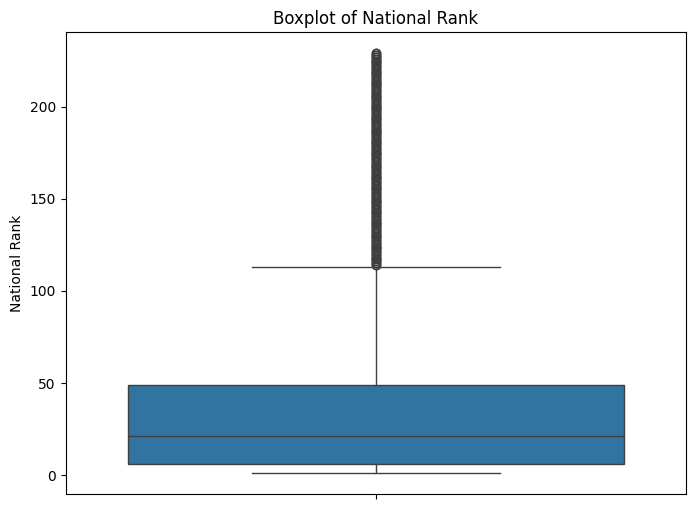

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['national_rank'])
plt.title('Boxplot of National Rank')
plt.ylabel('National Rank')
plt.show()

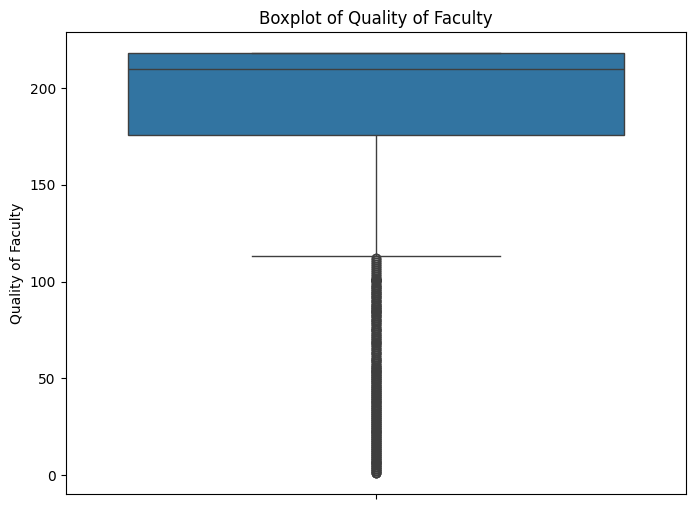

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['quality_of_faculty'])
plt.title('Boxplot of Quality of Faculty')
plt.ylabel('Quality of Faculty')
plt.show()

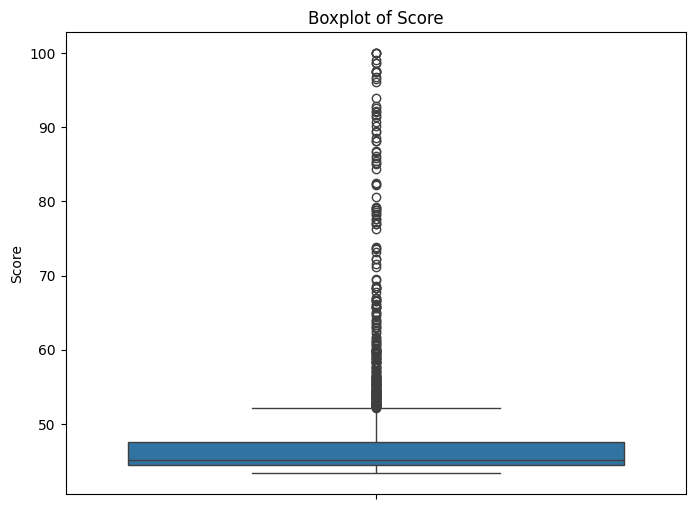

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['score'])
plt.title('Boxplot of Score')
plt.ylabel('Score')
plt.show()

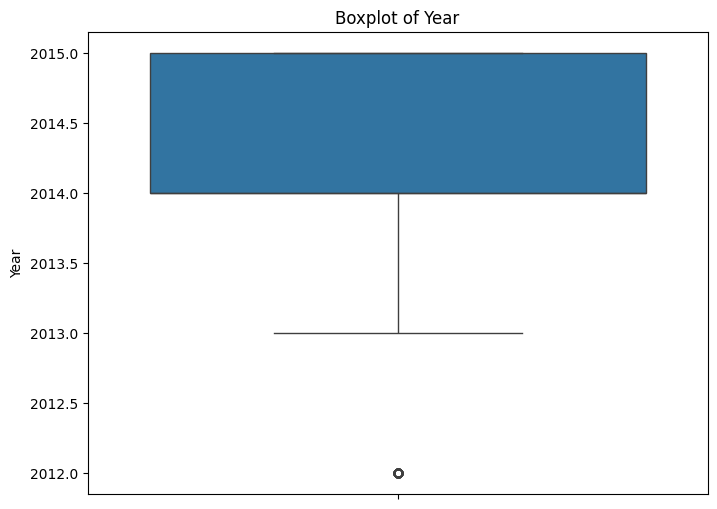

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['year'])
plt.title('Boxplot of Year')
plt.ylabel('Year')
plt.show()

#**Eksplorasi Data**

##**Comparison (Perbandingan)**

Aktivitas: Membandingkan negara (country) dengan kualitas (score) universitas

Tujuan: Untuk mengetahui negara mana yang memiliki sistem pendidikan tinggi paling unggul.

Insight: Dapat dilihat dari grafik yang ada, USA mendominasi peringkat dengan total skor yang signifikan, terbukti dengan banyaknya perguruan tinggi di USA menandakan bahwa sistem pendidikan dan persaingan domestik sangat baik dan ketat. Grafik juga menunjukkan bahwa terdapat kesenjangan kekuatan akademik yang besar antara USA dan negara lain.

Visualisasi: Bar Chart

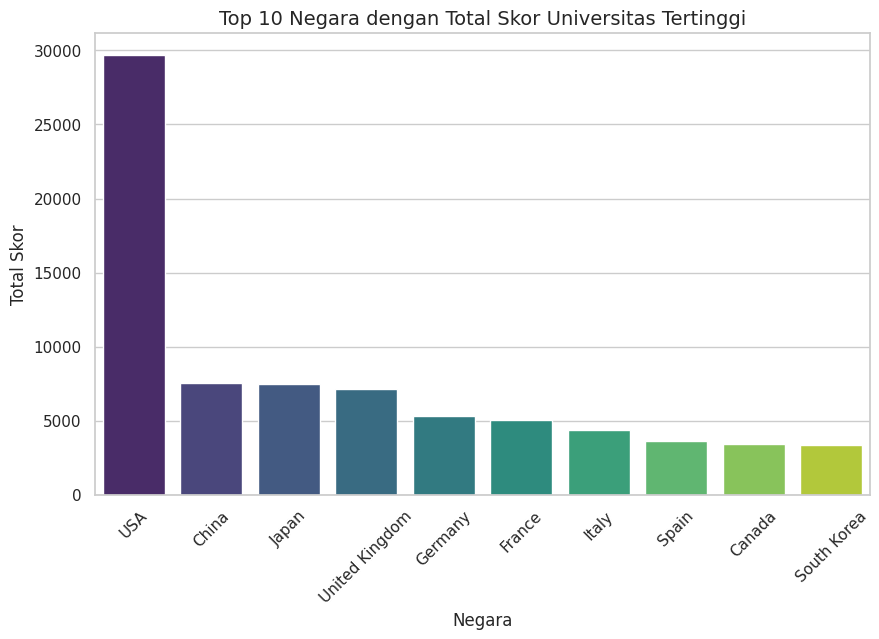

In [ ]:
top_10_negara = df.groupby('country')['score'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_10_negara.index,
    y=top_10_negara.values,
    palette='viridis',
    hue=top_10_negara.index,
    legend=False
)

plt.title('Top 10 Negara dengan Total Skor Universitas Tertinggi', fontsize=14)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Total Skor', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##**Composition (Komposisi)**

Aktivitas: Menganalisis proporsi 10 negara dengan jumlah universitas terbanyak dalam daftar peringkat.

Tujuan: untuk melihat negara mana saja yang mendominasi daftar universitas terbaik.

Insight: Grafik ini menunjukkan bahwa USA mengambil porsi terbanyak pada daftar universitas terbaik dunia. hasil visualisasi yang dapat ditarik adalah dominasi pendidikan global masih terpusat pada segelintir negara maju, sementara negara lain berbagi sisa porsi yang jauh lebih kecil.

Visualisasi: Pie Chart

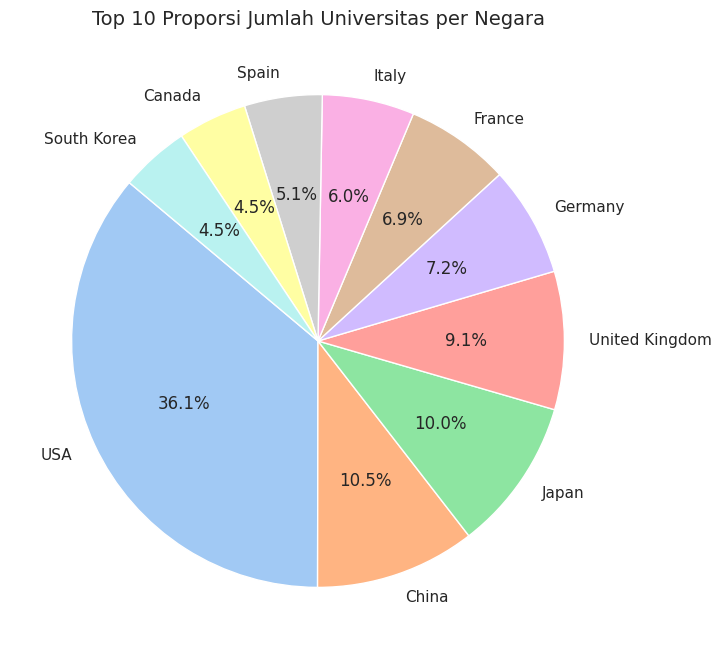

In [ ]:
top_10 = df['country'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Proporsi Jumlah Universitas per Negara', fontsize=14)
plt.show()

##**Distribution (Distribusi)**

Aktivitas: Melihat persebaran skor (score) dari seluruh universitas di dunia.

Tujuan: Untuk memahami apakah kualitas universitas di dunia itu merata atau ada kecenderungan.

Insight: Mayoritas universitas berada di sisi kiri grafik menunjukkan bahwa skor rendah antara 40-50. sednagkan sangat sediit universitas yang dapat mencapai skor di atas 80. Ini berarti menjadi universitas top itu sulit dan ada kesenjangan kualitas yang sangat lebar antara kampus peringkat atas dan kampus lainnya.

Visualisasi: Histogram

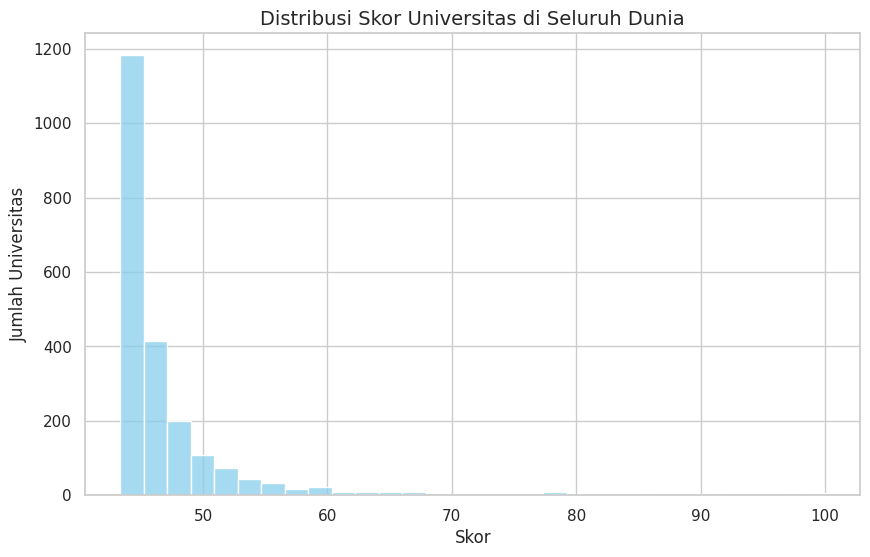

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['score'], bins=30, color='skyblue')
plt.title('Distribusi Skor Universitas di Seluruh Dunia', fontsize=14)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Jumlah Universitas', fontsize=12)
plt.show()

##**Relationship (Hubungan)**

Aktivitas: Menghubungkan jumlah publikasi penelitian dengan skor

Tujuan: Untuk melihat apakah universitas yang sering mempublikasikan penemuan/penelitian menjadi penentu utama untuk memiliki skor atau peringkat tinggi.

Insight: Terlihat hubungan yang positif, semakin kecil angka publikasi semakin baik, maka skor universitasnya cenderung makin tinggi. Ini menandakan bahwa publikasi riset adalah salah satu penentu utama yang mempengaruhi reputasi skor dan posisi universitas di tingkat internasional.

Visualisasi: Scatter Plot

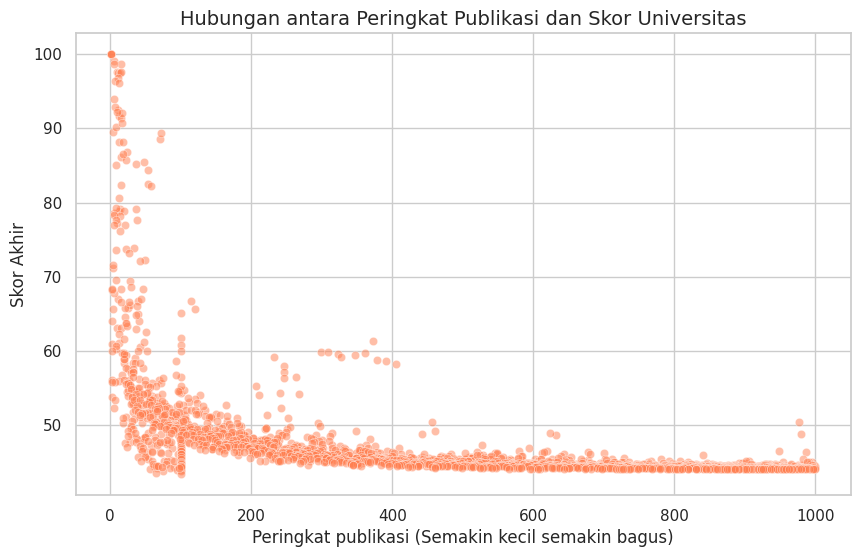

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='publications', y='score', alpha=0.5, color='coral')
plt.title('Hubungan antara Peringkat Publikasi dan Skor Universitas', fontsize=14)
plt.xlabel('Peringkat publikasi (Semakin kecil semakin bagus)', fontsize=12)
plt.ylabel('Skor Akhir', fontsize=12)
plt.show()

#**Data Preparation**

##Tipe Data

Pada informasi data dari dataset, terdapat 1 kolom yang memiliki tipe data yang sedikit janggal, yaitu kolom broad_impact. Kolom broad_impact memiliki tipe data float64, sedangkan secara teknis kolom broad_impact berisi peringkat. Peringkat adalah data yang menunjukkan posisi urutan dan harus berupa bilangan bulat. Tipe data float seakan memberi kesan seolah-olah ada kemungkinan angka di belakang koma. Sehingga harus dilakukan penanganan data pada kolom broad_impact dari float menjadi integer. Kemudian dapat dilihat setelah dilakukan penanganan pada tipe data, kolom broad_impact telah berubah tipe datanya menjadi integer.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [14]:
df['broad_impact'] = df['broad_impact'].astype('Int64')

In [16]:
df.dtypes

,0
world_rank,int64
institution,object
country,object
national_rank,int64
quality_of_education,int64
alumni_employment,int64
quality_of_faculty,int64
publications,int64
influence,int64
citations,int64


##Inconsistent Values

Setelah melakukan pengecekan data pada seluruh kolom, tidak ditemukan anomali data/data yang tidak konsisten

##Missing Values

Pada kolom broad impact, ditemukan missing value sebesar 9%. Terdapat kurang lebih 200 baris data yang kosong, selain itu semua kolom terisi penuh dengan data.

Penanganan dilakukan dengan menggunakan imputasi median karena data bersifat peringkat. Jarak antara peringkat 1 ke 2 mungkin tidak sama signifikansinya dengan peringkat 500 ke 501. Kemudian jika ada universitas dengan skor dampak yang sangat buruk, maka mean akan bergeser secara signifikan, sementara median tetap di tengah.

In [7]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
world_rank,0.000000
institution,0.000000
country,0.000000
national_rank,0.000000
quality_of_education,0.000000
alumni_employment,0.000000
quality_of_faculty,0.000000
publications,0.000000
influence,0.000000
citations,0.000000


In [8]:
df['broad_impact'] = df['broad_impact'].fillna(df['broad_impact'].dropna().median())

In [9]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
world_rank,0.0
institution,0.0
country,0.0
national_rank,0.0
quality_of_education,0.0
alumni_employment,0.0
quality_of_faculty,0.0
publications,0.0
influence,0.0
citations,0.0


##Duplicated Values

Pada bagian ini, kita akan mengecek dan melakukan penanganan pada data yang duplikat. Akan tetapi, data duplikat tidak ada, jadi tidak perlu dilakukan penanganan.

In [10]:
df[df.duplicated()]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year


##Outliers

Pada tahap ini, kita akan melakukan penanganan terhadap outliers values.

Melihat hasil outliers pada dataset, dapat dilihat bahwa terdapat outliers pada kolom:

- national_rank sebesar 10%
- quality_of_faculty sebesar 19%
- score sebesar 11%
- year sebesar 4%

Namun, tidak semua kolom yang memiliki outliers harus ditangani. Outlier pada kolom score dan quality_of_faculty bukan karena kesalahan input data, melainkan karena realitas dunia pendidikan di mana kesenjangan antara universitas elit dan universitas biasa memang sangat lebar. Justru jika outlier dihapus, maka akan menghilangkan informasi penting dari dataset. Kolom national_rank tidak dihapus outlier nya karena hanya akan menyisakan data dari negara-negara kecil dan bisa membuat analisis menjadi bias.

Jadi, kolom national_rank, quality_of_faculty, dan score tidak dihapus

In [11]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
world_rank,0.000000
national_rank,10.545455
quality_of_education,0.000000
alumni_employment,0.000000
quality_of_faculty,19.272727
publications,0.000000
influence,0.000000
citations,0.000000
broad_impact,0.000000
patents,0.000000


In [14]:
columns_to_impute = ["year"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [16]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
world_rank,0.000000
national_rank,0.000000
quality_of_education,0.000000
alumni_employment,0.000000
quality_of_faculty,19.272727
publications,0.000000
influence,0.000000
citations,0.000000
broad_impact,0.000000
patents,0.000000


#**Data Construstion**

Pada tahap data construction, kita akan membuat kolom baru berjudul "region". Kolom region perlu dibuat untuk mempermudah analisis antar benua dan menyederhanakan visualisasi data yang sebelumnya terlalu rumit jika hanya menggunakan nama negara.

In [25]:
region_map = {
    'USA': 'North America', 'Canada': 'North America', 'Puerto Rico':'North America',
    'United Kingdom': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe', 'Netherlands': 'Europe',
    'China': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia', 'India': 'Asia', 'Taiwan': 'Asia', 'Singapore':'Asia',
    'Hong Kong':'Asia', 'Thailand': 'Asia', 'Malaysia': 'Asia', 'Lebanon':'Asia','Iran':'Asia',
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
    'Brazil': 'Latin America', 'Chile': 'Latin America', 'Mexico': 'Latin America','Argentina':'Latin America',
    'Colombia':'South America','Uruguay':'South America',
    'South Africa': 'Africa', 'Egypt': 'Africa','Uganda':'Africa',
    'Israel': 'Middle East', 'Saudi Arabia': 'Middle East', 'United Arab Emirates': 'Middle East',
    'Portugal':'Europe', 'Spain':'Europe','Switzerland':'Europe','Sweden':'Europe','Finland':'Europe', 'Norway':'Europe',
    'Denmark':'Europe','Russia':'Europe','Belgium':'Europe','Ireland':'Europe', 'Austria': 'Europe', 'Czech Republic':'Europe',
    'Greece':'Europe','Hungary':'Europe','Turkey':'Europe','Poland':'Europe', 'Iceland':'Europe','Slovenia':'Europe',
    'Estonia':'Europe','Croatia':'Europe','Slovak Republic':'Europe','Serbia':'Europe','Bulgaria':'Europe','Lithuania':'Europe',
    'Cyprus':'Europe','Romania':'Europe'
}
df['region'] = df['country'].map(region_map)
df['region'] = df['region'].fillna('Other')

In [26]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,region
0,1,Harvard University,USA,1.0,7,9,1,1,1,1,496.0,5,100.00,2012.5,North America
1,2,Massachusetts Institute of Technology,USA,2.0,9,17,3,12,4,4,496.0,1,91.67,2012.5,North America
2,3,Stanford University,USA,3.0,17,11,5,4,2,2,496.0,15,89.50,2012.5,North America
3,4,University of Cambridge,United Kingdom,1.0,10,24,4,16,16,11,496.0,50,86.17,2012.5,Europe
4,5,California Institute of Technology,USA,4.0,2,29,7,37,22,22,496.0,18,85.21,2012.5,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7.0,367,567,218,926,845,812,969.0,816,44.03,2015.0,Europe
2196,997,Alexandria University,Egypt,4.0,236,566,218,997,908,645,981.0,871,44.03,2015.0,Africa
2197,998,Federal University of Ceará,Brazil,18.0,367,549,218,830,823,812,975.0,824,44.03,2015.0,Latin America
2198,999,University of A Coruña,Spain,40.0,367,567,218,886,974,812,975.0,651,44.02,2015.0,Europe


#**Data Reduction**

Pada tahap ini, kita akan melakukan penanganan data reduction, kolom yang tidak relevan untuk melakukan visualisasi akan dihapus.

Kolom "broad_impact" akan dihapus karena memiliki banyak sekali missing values terutama pada data tahun 2012-2013. Jika melakukan analisis jangka panjang dari 2012-2015 maka akan menyebabkan inkonsistensi.

Kolom national_rank akan dihapus karena kita akan berfokus pada peringkat global dan bukan lagi peringkat nasional universitas di suatu negara. Kolom national_rank juga bukanlah indikator kualitas absolut antar universitas secara global.

In [30]:
df = df.drop(['broad_impact', 'national_rank'], axis=1)

In [31]:
df

,world_rank,institution,country,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,region
0,1,Harvard University,USA,7,9,1,1,1,1,5,100.00,2012.5,North America
1,2,Massachusetts Institute of Technology,USA,9,17,3,12,4,4,1,91.67,2012.5,North America
2,3,Stanford University,USA,17,11,5,4,2,2,15,89.50,2012.5,North America
3,4,University of Cambridge,United Kingdom,10,24,4,16,16,11,50,86.17,2012.5,Europe
4,5,California Institute of Technology,USA,2,29,7,37,22,22,18,85.21,2012.5,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,367,567,218,926,845,812,816,44.03,2015.0,Europe
2196,997,Alexandria University,Egypt,236,566,218,997,908,645,871,44.03,2015.0,Africa
2197,998,Federal University of Ceará,Brazil,367,549,218,830,823,812,824,44.03,2015.0,Latin America
2198,999,University of A Coruña,Spain,367,567,218,886,974,812,651,44.02,2015.0,Europe


#**Menyimpan Dataset**

In [32]:
df.to_csv('/content/drive/MyDrive/AVD Dataset/World University Rankings.csv', index=False)